# Part 1: Data preprocessing¶
Dataset link - https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data?select=Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


## Importing the libraries and dataset

In [71]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [3]:
dataset = pd.read_csv('data/1429_1.csv')

/var/folders/rx/4psh00tn6bs4nskbyv97wzcm0000gp/T/ipykernel_47274/3645407929.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('data/1429_1.csv')


In [4]:
# Specify the data types for the problematic columns
dtype_dict = {
    'id': 'str',  # Replace 'Column1_Name' with the actual column name
    'reviews.dateSeen': 'str'  # Replace 'Column10_Name' with the actual column name
}

# Load the CSV file with the specified data types
dataset = pd.read_csv('data/1429_1.csv', dtype=dtype_dict, low_memory=False)

# Verify the data types
print(dataset.dtypes)

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object


In [5]:
dataset.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## Data Exploration

In [6]:
dataset.shape

(34660, 21)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [10]:
# Get all unique values in the "brand" column
unique_brands = dataset['brand'].unique()
unique_brands

array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.'], dtype=object)

In [11]:
# Get all unique values in the "asins" column
unique_asins = dataset['asins'].unique()
unique_asins

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [15]:
# Get all unique values in the "doRecommend" column
unique_doRecommend = dataset['reviews.doRecommend'].unique()
unique_doRecommend

array([True, False, nan], dtype=object)

In [25]:
# Get the count of rows with NaN values in the 'reviews.doRecommend' column
nan_count = dataset['reviews.doRecommend'].isna().sum()
nan_count

594

In [26]:
# New dataset with only relevant columns
dataset_rel = dataset[['reviews.title', 'reviews.text', 'reviews.rating','reviews.doRecommend']]
dataset_rel.head()

,reviews.title,reviews.text,reviews.rating,reviews.doRecommend
0,Kindle,This product so far has not disappointed. My c...,5.0,True
1,very fast,great for beginner or experienced person. Boug...,5.0,True
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,True
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,True
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,True


In [27]:
# Create a copy of the relevant columns to avoid the SettingWithCopyWarning
dataset_rel = dataset[['reviews.title', 'reviews.text', 'reviews.rating', 'reviews.doRecommend']].copy()

# Prepend reviews.title to reviews.text with a space in between using .loc
dataset_rel.loc[:, 'reviews.text'] = dataset_rel['reviews.title'] + ' ' + dataset_rel['reviews.text']

# Remove the reviews.title column
dataset_rel = dataset_rel.drop(columns=['reviews.title'])

# Display the first few rows of the updated DataFrame
dataset_rel.head()


,reviews.text,reviews.rating,reviews.doRecommend
0,Kindle This product so far has not disappointe...,5.0,True
1,very fast great for beginner or experienced pe...,5.0,True
2,Beginner tablet for our 9 year old son. Inexpe...,5.0,True
3,Good!!! I've had my Fire HD 8 two weeks now an...,4.0,True
4,Fantastic Tablet for kids I bought this for my...,5.0,True


## Dealing with missing values

In [28]:
dataset_rel.isnull().values.any()

True

In [29]:
dataset_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reviews.text         34653 non-null  object 
 1   reviews.rating       34627 non-null  float64
 2   reviews.doRecommend  34066 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


In [31]:
# Drop null values
dataset_rel = dataset_rel.copy()
dataset_rel.dropna(inplace=True)
dataset_rel.isnull().sum()

reviews.text           0
reviews.rating         0
reviews.doRecommend    0
dtype: int64

In [34]:
dataset_rel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34061 entries, 0 to 34624
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reviews.text         34061 non-null  object 
 1   reviews.rating       34061 non-null  float64
 2   reviews.doRecommend  34061 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [35]:
# Descriptive statistics
dataset_rel.describe()

,reviews.rating
count,34061.000000
mean,4.589619
std,0.721812
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
# Distribution of rating
dataset_rel['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23385
4.0     8468
3.0     1470
2.0      382
1.0      356
Name: count, dtype: int64

## Review Ratings Count Plot

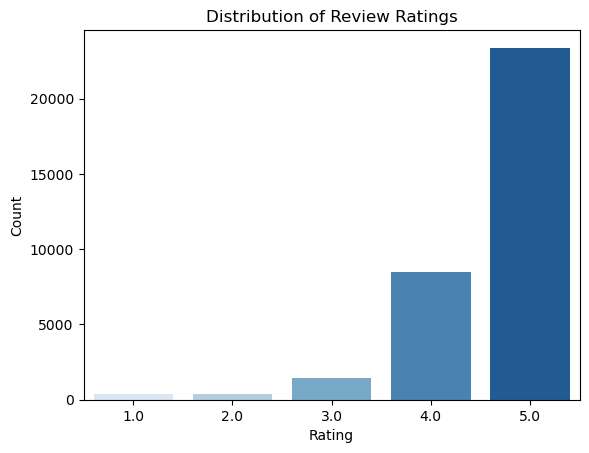

In [37]:
# Distribution of reviews rating
sns.countplot(x = dataset_rel['reviews.rating'], palette='Blues')

plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Sentiment Analysis Labeling (Ratings 1,2,3 to Negative and 4,5 to Positive)

In [39]:
# Map ratings to sentiments
sentiment_score = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}
sentiment = {0: 'Negative', 1: 'Positive'}
dataset_rel['sentiment.score'] = dataset_rel['reviews.rating'].map(sentiment_score)
dataset_rel['sentiment'] = dataset_rel['sentiment.score'].map(sentiment)

In [40]:
dataset_rel.head(20)

,reviews.text,reviews.rating,reviews.doRecommend,sentiment.score,sentiment
0,Kindle This product so far has not disappointe...,5.0,True,1,Positive
1,very fast great for beginner or experienced pe...,5.0,True,1,Positive
2,Beginner tablet for our 9 year old son. Inexpe...,5.0,True,1,Positive
3,Good!!! I've had my Fire HD 8 two weeks now an...,4.0,True,1,Positive
4,Fantastic Tablet for kids I bought this for my...,5.0,True,1,Positive
5,Just what we expected This amazon fire 8 inch ...,5.0,True,1,Positive
6,great e-reader tablet Great for e-reading on t...,4.0,True,1,Positive
7,Great for gifts I gave this as a Christmas gif...,5.0,True,1,Positive
8,Great for reading Great as a device to read bo...,5.0,True,1,Positive
9,Great and lightweight reader I love ordering b...,5.0,True,1,Positive


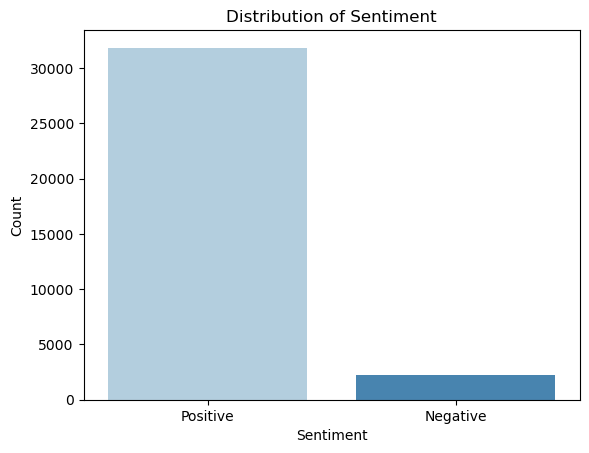

In [41]:
# Distribution of sentiment
sns.countplot(x = dataset_rel['sentiment'], palette='Blues')

plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [42]:
# Positive reviews
(dataset_rel['sentiment'] == "Positive").sum()

31853

In [43]:
# Negative reviews
(dataset_rel['sentiment'] == "Negative").sum()

2208

## Normalization 
Remove special chars, extra spaces and convert to lowercase

In [46]:
import pandas as pd
import re
from bs4 import BeautifulSoup


# Function to clean text
def clean_text(text):
    # Remove HTML tags
    # text = BeautifulSoup(text, "html.parser").get_text()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [47]:
# Apply the clean_text function to the reviews.text column
dataset_rel['reviews.text'] = dataset_rel['reviews.text'].apply(clean_text)

# Display the cleaned DataFrame
dataset_rel.head()

,reviews.text,reviews.rating,reviews.doRecommend,sentiment.score,sentiment
0,kindle this product so far has not disappointe...,5.0,True,1,Positive
1,very fast great for beginner or experienced pe...,5.0,True,1,Positive
2,beginner tablet for our year old son inexpensi...,5.0,True,1,Positive
3,good ive had my fire hd two weeks now and i lo...,4.0,True,1,Positive
4,fantastic tablet for kids i bought this for my...,5.0,True,1,Positive


## Tokenization
Split the text into individual words or tokens

In [51]:
# Ensure you have downloaded the necessary NLTK data files
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/psubba/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the tokenize_text function to the reviews.text column
dataset_rel['reviews.tokens'] = dataset_rel['reviews.text'].apply(tokenize_text)

# Display the DataFrame with tokenized text
dataset_rel.head()

,reviews.text,reviews.rating,reviews.doRecommend,sentiment.score,sentiment,reviews.tokens
0,kindle this product so far has not disappointe...,5.0,True,1,Positive,"[kindle, this, product, so, far, has, not, dis..."
1,very fast great for beginner or experienced pe...,5.0,True,1,Positive,"[very, fast, great, for, beginner, or, experie..."
2,beginner tablet for our year old son inexpensi...,5.0,True,1,Positive,"[beginner, tablet, for, our, year, old, son, i..."
3,good ive had my fire hd two weeks now and i lo...,4.0,True,1,Positive,"[good, ive, had, my, fire, hd, two, weeks, now..."
4,fantastic tablet for kids i bought this for my...,5.0,True,1,Positive,"[fantastic, tablet, for, kids, i, bought, this..."


## Stop Words Removal
Remove common words  that do not contribute to the sentiment

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/psubba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply the stop words removal function to the tokenized text
dataset_rel['reviews.tokens_no_stopwords'] = dataset_rel['reviews.tokens'].apply(remove_stopwords)

In [58]:
# Display the DataFrame with processed tokens
dataset_rel[['reviews.tokens', 'reviews.tokens_no_stopwords']].head(10)

,reviews.tokens,reviews.tokens_no_stopwords
0,"[kindle, this, product, so, far, has, not, dis...","[kindle, product, far, disappointed, children,..."
1,"[very, fast, great, for, beginner, or, experie...","[fast, great, beginner, experienced, person, b..."
2,"[beginner, tablet, for, our, year, old, son, i...","[beginner, tablet, year, old, son, inexpensive..."
3,"[good, ive, had, my, fire, hd, two, weeks, now...","[good, ive, fire, hd, two, weeks, love, tablet..."
4,"[fantastic, tablet, for, kids, i, bought, this...","[fantastic, tablet, kids, bought, grand, daugh..."
5,"[just, what, we, expected, this, amazon, fire,...","[expected, amazon, fire, inch, tablet, perfect..."
6,"[great, ereader, tablet, great, for, ereading,...","[great, ereader, tablet, great, ereading, go, ..."
7,"[great, for, gifts, i, gave, this, as, a, chri...","[great, gifts, gave, christmas, gift, inlaws, ..."
8,"[great, for, reading, great, as, a, device, to...","[great, reading, great, device, read, books, l..."
9,"[great, and, lightweight, reader, i, love, ord...","[great, lightweight, reader, love, ordering, b..."


## Stemming
Reduce words to their root form

In [59]:
# Initialize stemmer
stemmer = PorterStemmer()

# Function to apply stemming
def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

In [60]:
# Apply the stemming function to the tokens without stop words
dataset_rel['reviews.tokens_stemmed'] = dataset_rel['reviews.tokens_no_stopwords'].apply(apply_stemming)

In [61]:
# Display the DataFrame with processed tokens
dataset_rel[['reviews.tokens_no_stopwords', 'reviews.tokens_stemmed']].head(10)

,reviews.tokens_no_stopwords,reviews.tokens_stemmed
0,"[kindle, product, far, disappointed, children,...","[kindl, product, far, disappoint, children, lo..."
1,"[fast, great, beginner, experienced, person, b...","[fast, great, beginn, experienc, person, bough..."
2,"[beginner, tablet, year, old, son, inexpensive...","[beginn, tablet, year, old, son, inexpens, tab..."
3,"[good, ive, fire, hd, two, weeks, love, tablet...","[good, ive, fire, hd, two, week, love, tablet,..."
4,"[fantastic, tablet, kids, bought, grand, daugh...","[fantast, tablet, kid, bought, grand, daughter..."
5,"[expected, amazon, fire, inch, tablet, perfect...","[expect, amazon, fire, inch, tablet, perfect, ..."
6,"[great, ereader, tablet, great, ereading, go, ...","[great, eread, tablet, great, eread, go, nice,..."
7,"[great, gifts, gave, christmas, gift, inlaws, ...","[great, gift, gave, christma, gift, inlaw, hus..."
8,"[great, reading, great, device, read, books, l...","[great, read, great, devic, read, book, like, ..."
9,"[great, lightweight, reader, love, ordering, b...","[great, lightweight, reader, love, order, book..."


## Lemmatization
Reduce words to their base or dictionary form

In [62]:
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

[nltk_data] Downloading package wordnet to /Users/psubba/nltk_data...


In [63]:
# Apply the lemmatization function to the stemmed tokens
dataset_rel['reviews.tokens_lemmatized'] = dataset_rel['reviews.tokens_stemmed'].apply(apply_lemmatization)

In [64]:
# Display the DataFrame with processed tokens
dataset_rel[['reviews.tokens_stemmed', 'reviews.tokens_lemmatized']].head(10)

,reviews.tokens_stemmed,reviews.tokens_lemmatized
0,"[kindl, product, far, disappoint, children, lo...","[kindl, product, far, disappoint, child, love,..."
1,"[fast, great, beginn, experienc, person, bough...","[fast, great, beginn, experienc, person, bough..."
2,"[beginn, tablet, year, old, son, inexpens, tab...","[beginn, tablet, year, old, son, inexpens, tab..."
3,"[good, ive, fire, hd, two, week, love, tablet,...","[good, ive, fire, hd, two, week, love, tablet,..."
4,"[fantast, tablet, kid, bought, grand, daughter...","[fantast, tablet, kid, bought, grand, daughter..."
5,"[expect, amazon, fire, inch, tablet, perfect, ...","[expect, amazon, fire, inch, tablet, perfect, ..."
6,"[great, eread, tablet, great, eread, go, nice,...","[great, eread, tablet, great, eread, go, nice,..."
7,"[great, gift, gave, christma, gift, inlaw, hus...","[great, gift, gave, christma, gift, inlaw, hus..."
8,"[great, read, great, devic, read, book, like, ...","[great, read, great, devic, read, book, like, ..."
9,"[great, lightweight, reader, love, order, book...","[great, lightweight, reader, love, order, book..."


In [66]:
# Join the processed tokens back into a string
dataset_rel['reviews.processed'] = dataset_rel['reviews.tokens_lemmatized'].apply(lambda x: ' '.join(x))

In [67]:
# Display the DataFrame with processed reviews
dataset_rel[['reviews.processed']].head(10)

,reviews.processed
0,kindl product far disappoint child love use li...
1,fast great beginn experienc person bought gift...
2,beginn tablet year old son inexpens tablet use...
3,good ive fire hd two week love tablet great va...
4,fantast tablet kid bought grand daughter come ...
5,expect amazon fire inch tablet perfect size pu...
6,great eread tablet great eread go nice light w...
7,great gift gave christma gift inlaw husband un...
8,great read great devic read book like link bor...
9,great lightweight reader love order book read ...


# Part 2: Sentiment Analysis

## Feature Extraction or Feature Representation

The feature extraction step refers to extracting and producing feature representations appropriate for the required NLP task and the type of model used. Feature extraction techniques are necessary to convert text into features' matrices (or vectors). Some popular techniques for feature extraction are the bag-of-words model and term frequency-inverse document frequency (TF–IDF).

## Bag of Words (BoW) Feature Extraction
Use CountVectorizer to create a Bag of Words model

In [70]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the processed text data
X_bow = count_vectorizer.fit_transform(dataset_rel['reviews.processed'])

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the Bag of Words feature matrix
print("Bag of Words feature matrix:")
print(bow_df.head())


Bag of Words feature matrix:
   aa  aaa  aaammaaaz  aamazon  aand  abandon  abatteri  abc  abcmous  \
0   0    0          0        0     0        0         0    0        0   
1   0    0          0        0     0        0         0    0        0   
2   0    0          0        0     0        0         0    0        0   
3   0    0          0        0     0        0         0    0        0   
4   0    0          0        0     0        0         0    0        0   

   abcmousecom  ...  zigbe  zinio  zip  zipper  zippi  zombiesotherwis  zone  \
0            0  ...      0      0    0       0      0                0     0   
1            0  ...      0      0    0       0      0                0     0   
2            0  ...      0      0    0       0      0                0     0   
3            0  ...      0      0    0       0      0                0     0   
4            0  ...      0      0    0       0      0                0     0   

   zoo  zoom  zwave  
0    0     0      0  
1    0 

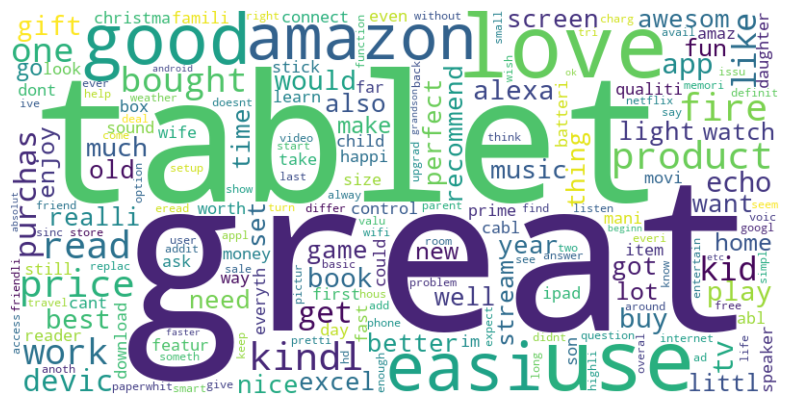

In [73]:
# Sum up the counts of each word in the vocabulary
word_counts = bow_df.sum(axis=0)

# Convert the word counts to a dictionary
word_counts_dict = word_counts.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## TF-IDF Feature Extraction
Use TfidfVectorizer to create a TF-IDF model

In [76]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
X_tfidf = tfidf_vectorizer.fit_transform(dataset_rel['reviews.processed'])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF feature matrix
print("TF-IDF feature matrix:")
print(tfidf_df.head())


TF-IDF feature matrix:
    aa  aaa  aaammaaaz  aamazon  aand  abandon  abatteri  abc  abcmous  \
0  0.0  0.0        0.0      0.0   0.0      0.0       0.0  0.0      0.0   
1  0.0  0.0        0.0      0.0   0.0      0.0       0.0  0.0      0.0   
2  0.0  0.0        0.0      0.0   0.0      0.0       0.0  0.0      0.0   
3  0.0  0.0        0.0      0.0   0.0      0.0       0.0  0.0      0.0   
4  0.0  0.0        0.0      0.0   0.0      0.0       0.0  0.0      0.0   

   abcmousecom  ...  zigbe  zinio  zip  zipper  zippi  zombiesotherwis  zone  \
0          0.0  ...    0.0    0.0  0.0     0.0    0.0              0.0   0.0   
1          0.0  ...    0.0    0.0  0.0     0.0    0.0              0.0   0.0   
2          0.0  ...    0.0    0.0  0.0     0.0    0.0              0.0   0.0   
3          0.0  ...    0.0    0.0  0.0     0.0    0.0              0.0   0.0   
4          0.0  ...    0.0    0.0  0.0     0.0    0.0              0.0   0.0   

   zoo  zoom  zwave  
0  0.0   0.0    0.0  
1  0.0 

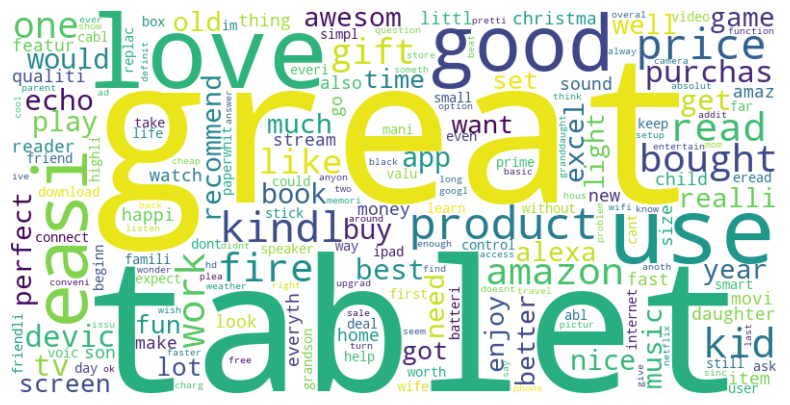

In [77]:
# Sum up the TF-IDF scores of each word in the vocabulary
tfidf_scores = tfidf_df.sum(axis=0)

# Convert the TF-IDF scores to a dictionary
tfidf_scores_dict = tfidf_scores.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Train-Test Split Dataset

In [79]:
# Labels
y = dataset_rel['sentiment.score']

In [80]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [81]:
X_train_bow.shape

(27248, 13267)

In [83]:
X_test_bow.shape

(6813, 13267)

In [84]:
X_train_tfidf.shape

(27248, 13267)

In [85]:
X_test_tfidf.shape

(6813, 13267)

## Train Machine Learning Models

Zero Division Handling: The zero_division parameter ensures that undefined metrics do not cause errors and are handled gracefully

In [106]:
import time
from sklearn.metrics import confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    processing_time = end_time - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Processing Time: {processing_time:.2f} seconds")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

In [107]:
# Train and evaluate Naive Bayes
print("Naive Bayes with BoW features:")
nb_bow = MultinomialNB()
evaluate_model(nb_bow, X_train_bow, X_test_bow, y_train, y_test)

Naive Bayes with BoW features:
Accuracy: 0.94
Precision: 0.96
Recall: 0.98
F1-score: 0.97
Processing Time: 0.01 seconds
Confusion Matrix:
[[ 178  283]
 [ 135 6217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.39      0.46       461
           1       0.96      0.98      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.76      0.68      0.71      6813
weighted avg       0.93      0.94      0.93      6813



In [108]:
# Train and evaluate Naive Bayes
print("Naive Bayes with TF-IDF features:")
nb_tfidf = MultinomialNB()
evaluate_model(nb_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

Naive Bayes with TF-IDF features:
Accuracy: 0.93
Precision: 0.93
Recall: 1.00
F1-score: 0.96
Processing Time: 0.01 seconds
Confusion Matrix:
[[   0  461]
 [   0 6352]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       461
           1       0.93      1.00      0.96      6352

    accuracy                           0.93      6813
   macro avg       0.97      0.50      0.48      6813
weighted avg       0.94      0.93      0.90      6813



In [109]:
# Train and evaluate Logistic Regression
print("Logistic Regression with BoW features:")
lr_bow = LogisticRegression(max_iter=1000)
evaluate_model(lr_bow, X_train_bow, X_test_bow, y_train, y_test)

print("Logistic Regression with TF-IDF features:")
lr_tfidf = LogisticRegression(max_iter=1000)
evaluate_model(lr_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

Logistic Regression with BoW features:
Accuracy: 0.95
Precision: 0.96
Recall: 0.99
F1-score: 0.97
Processing Time: 0.61 seconds
Confusion Matrix:
[[ 178  283]
 [  81 6271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.39      0.49       461
           1       0.96      0.99      0.97      6352

    accuracy                           0.95      6813
   macro avg       0.82      0.69      0.73      6813
weighted avg       0.94      0.95      0.94      6813

Logistic Regression with TF-IDF features:
Accuracy: 0.94
Precision: 0.95
Recall: 1.00
F1-score: 0.97
Processing Time: 0.28 seconds
Confusion Matrix:
[[ 105  356]
 [  23 6329]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.23      0.36       461
           1       0.95      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.88      0.61      0.66      6813
weight

In [110]:
from sklearn.svm import SVC

# Train and evaluate Support Vector Machine (SVM)
print("SVM with BoW features:")
svm_bow = SVC()
evaluate_model(svm_bow, X_train_bow, X_test_bow, y_train, y_test)

print("SVM with TF-IDF features:")
svm_tfidf = SVC()
evaluate_model(svm_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

SVM with BoW features:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 111.17 seconds
Confusion Matrix:
[[  70  391]
 [  13 6339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.15      0.26       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.89      0.57      0.61      6813
weighted avg       0.94      0.94      0.92      6813

SVM with TF-IDF features:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 106.74 seconds
Confusion Matrix:
[[  87  374]
 [  17 6335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.19      0.31       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.89      0.59      0.64      6813
weighted avg       0.94      0.94 

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
print("Random Forest with BoW features:")
rf_bow = RandomForestClassifier(n_estimators=100)
evaluate_model(rf_bow, X_train_bow, X_test_bow, y_train, y_test)

print("Random Forest with TF-IDF features:")
rf_tfidf = RandomForestClassifier(n_estimators=100)
evaluate_model(rf_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

Random Forest with BoW features:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 47.11 seconds
Confusion Matrix:
[[  45  416]
 [   4 6348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.10      0.18       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.93      0.55      0.57      6813
weighted avg       0.94      0.94      0.91      6813

Random Forest with TF-IDF features:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 45.80 seconds
Confusion Matrix:
[[  35  426]
 [   5 6347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.08      0.14       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.91      0.54      0.55      6813
weighted avg    

## Cross-Validation for Robustness

In [116]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def cross_validate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


In [117]:
# Cross-validation for Naive Bayes
print("Naive Bayes with BoW features:")
cross_validate_model(nb_bow, X_bow, y)

print("Naive Bayes with TF-IDF features:")
cross_validate_model(nb_tfidf, X_tfidf, y)

Naive Bayes with BoW features:
Cross-validation Accuracy: 0.91 ± 0.02
Naive Bayes with TF-IDF features:
Cross-validation Accuracy: 0.93 ± 0.00


In [118]:
# Cross-validation for Logistic Regression
print("Logistic Regression with BoW features:")
cross_validate_model(lr_bow, X_bow, y)

print("Logistic Regression with TF-IDF features:")
cross_validate_model(lr_tfidf, X_tfidf, y)

Logistic Regression with BoW features:
Cross-validation Accuracy: 0.94 ± 0.01
Logistic Regression with TF-IDF features:
Cross-validation Accuracy: 0.94 ± 0.00


In [119]:
# Cross-validation for SVM
print("SVM with BoW features:")
cross_validate_model(svm_bow, X_bow, y)

print("SVM with TF-IDF features:")
cross_validate_model(svm_tfidf, X_tfidf, y)


SVM with BoW features:
Cross-validation Accuracy: 0.94 ± 0.00
SVM with TF-IDF features:
Cross-validation Accuracy: 0.94 ± 0.00


In [120]:
# Cross-validation for Random Forest
print("Random Forest with BoW features:")
cross_validate_model(rf_bow, X_bow, y)

print("Random Forest with TF-IDF features:")
cross_validate_model(rf_tfidf, X_tfidf, y)

Random Forest with BoW features:
Cross-validation Accuracy: 0.94 ± 0.00
Random Forest with TF-IDF features:
Cross-validation Accuracy: 0.94 ± 0.00


In [121]:
print(dataset_rel['sentiment.score'].value_counts())

sentiment.score
1    31853
0     2208
Name: count, dtype: int64


### Handling Class Imbalance with class_weight
Class Weights: Using class weights helps handle class imbalance by giving more importance to the minority class during training.


In [122]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}


### Train and evaluate models with class weights

In [124]:
print("Logistic Regression with BoW features and class weights:")
lr_bow = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate_model(lr_bow, X_train_bow, X_test_bow, y_train, y_test)

print("Logistic Regression with TF-IDF features and class weights:")
lr_tfidf = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate_model(lr_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

Logistic Regression with BoW features and class weights:
Accuracy: 0.89
Precision: 0.97
Recall: 0.91
F1-score: 0.94
Processing Time: 0.91 seconds
Confusion Matrix:
[[ 312  149]
 [ 590 5762]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.68      0.46       461
           1       0.97      0.91      0.94      6352

    accuracy                           0.89      6813
   macro avg       0.66      0.79      0.70      6813
weighted avg       0.93      0.89      0.91      6813

Logistic Regression with TF-IDF features and class weights:
Accuracy: 0.88
Precision: 0.98
Recall: 0.89
F1-score: 0.93
Processing Time: 0.45 seconds
Confusion Matrix:
[[ 346  115]
 [ 727 5625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.75      0.45       461
           1       0.98      0.89      0.93      6352

    accuracy                           0.88      6813
   macro avg       0.65 

In [125]:
print("SVM with BoW features and class weights:")
svm_bow = SVC(class_weight='balanced')
evaluate_model(svm_bow, X_train_bow, X_test_bow, y_train, y_test)

print("SVM with TF-IDF features and class weights:")
svm_tfidf = SVC(class_weight='balanced')
evaluate_model(svm_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

SVM with BoW features and class weights:
Accuracy: 0.93
Precision: 0.96
Recall: 0.96
F1-score: 0.96
Processing Time: 155.21 seconds
Confusion Matrix:
[[ 201  260]
 [ 226 6126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.44      0.45       461
           1       0.96      0.96      0.96      6352

    accuracy                           0.93      6813
   macro avg       0.72      0.70      0.71      6813
weighted avg       0.93      0.93      0.93      6813

SVM with TF-IDF features and class weights:
Accuracy: 0.95
Precision: 0.96
Recall: 0.98
F1-score: 0.97
Processing Time: 154.78 seconds
Confusion Matrix:
[[ 196  265]
 [ 103 6249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.43      0.52       461
           1       0.96      0.98      0.97      6352

    accuracy                           0.95      6813
   macro avg       0.81      0.70      0.74      681

In [126]:
print("Random Forest with BoW features and class weights:")
rf_bow = RandomForestClassifier(n_estimators=100, class_weight='balanced')
evaluate_model(rf_bow, X_train_bow, X_test_bow, y_train, y_test)

print("Random Forest with TF-IDF features and class weights:")
rf_tfidf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
evaluate_model(rf_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test)

Random Forest with BoW features and class weights:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 37.23 seconds
Confusion Matrix:
[[  21  440]
 [   1 6351]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.05      0.09       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.94      0.52      0.53      6813
weighted avg       0.94      0.94      0.91      6813

Random Forest with TF-IDF features and class weights:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-score: 0.97
Processing Time: 33.22 seconds
Confusion Matrix:
[[  32  429]
 [   2 6350]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.07      0.13       461
           1       0.94      1.00      0.97      6352

    accuracy                           0.94      6813
   macro avg       0.94      0.53 